In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [28]:
# Load the dataset
column_names = [
    'Survival', 'Still_Alive', 'Age_at_Heart_Attack', 'Pericardial_Effusion', 
    'Fractional_Shortening', 'EPSS', 'LVDD', 'Wall_Motion_Index', 
    'Mult', 'Name', 'Group', 'Alive_at_1', 'Interval', 'Infarction_Code', 
    'Screwed_up'
]

df = pd.read_csv('data/echocardiogram.data', names=column_names, na_values="?")

# Drop unnecessary columns and clean data
df_clean = df.drop(columns=['Name', 'Interval', 'Infarction_Code', 'Screwed_up'])

# Convert necessary columns to numeric, forcing non-convertible values to NaN
df_clean['Survival'] = pd.to_numeric(df_clean['Survival'], errors='coerce')
df_clean['Still_Alive'] = pd.to_numeric(df_clean['Still_Alive'], errors='coerce')

# Drop rows where Survival or Still_Alive is NaN
df_clean = df_clean.dropna(subset=['Survival', 'Still_Alive'])

# Convert the Group column to categorical for stratification
df_clean['Group'] = df_clean['Group'].astype('category')

# Inspect unique values in the 'Group' column
print("Unique values in 'Group' column:", df_clean['Group'].unique())

group_1 = df_clean[df_clean['Group'] == 'name']
group_2 = df_clean[df_clean['Group'] == 'name']

Unique values in 'Group' column: ['name']
Categories (1, object): ['name']


In [29]:
# Perform Kaplan-Meier analysis
kmf = KaplanMeierFitter()

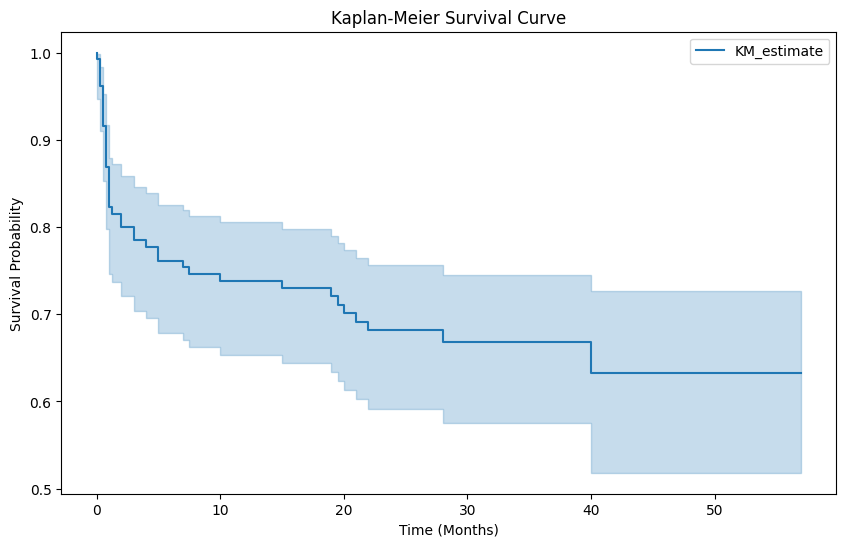

In [30]:
# Plot overall survival curve
plt.figure(figsize=(10, 6))
kmf.fit(durations=df_clean['Survival'], event_observed=df_clean['Still_Alive'])
kmf.plot(title='Kaplan-Meier Survival Curve', xlabel='Time (Months)', ylabel='Survival Probability')
plt.show()

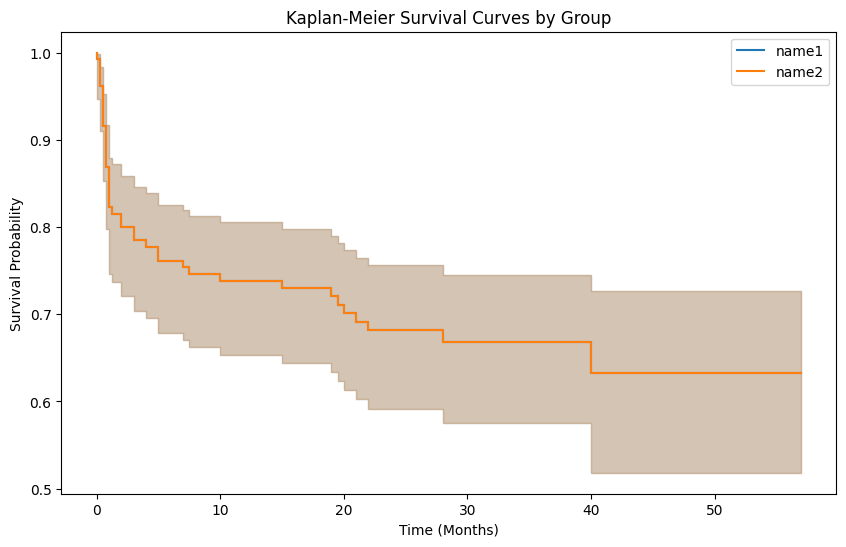

In [31]:
# Plot survival curves stratified by Group
plt.figure(figsize=(10, 6))
kmf.fit(group_1['Survival'], group_1['Still_Alive'], label='name1')
ax = kmf.plot()

kmf.fit(group_2['Survival'], group_2['Still_Alive'], label='name2')
kmf.plot(ax=ax)

plt.title('Kaplan-Meier Survival Curves by Group')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()

In [32]:
# Perform Log-Rank Test between the two groups
results = logrank_test(group_1['Survival'], group_2['Survival'], 
                       event_observed_A=group_1['Still_Alive'], 
                       event_observed_B=group_2['Still_Alive'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00

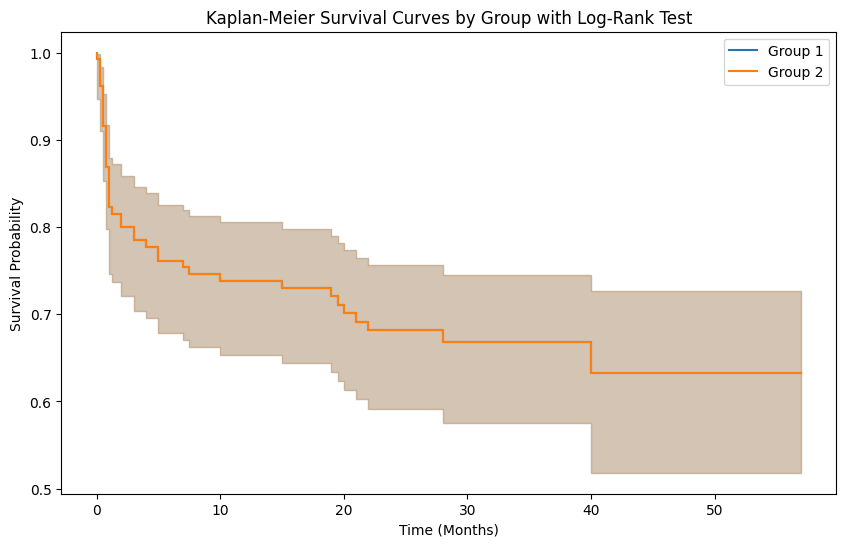

In [33]:
# Plot KM curve with log-rank test result
plt.figure(figsize=(10, 6))
kmf.fit(group_1['Survival'], group_1['Still_Alive'], label='Group 1')
ax = kmf.plot()

kmf.fit(group_2['Survival'], group_2['Still_Alive'], label='Group 2')
kmf.plot(ax=ax)

plt.title('Kaplan-Meier Survival Curves by Group with Log-Rank Test')
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.show()